In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

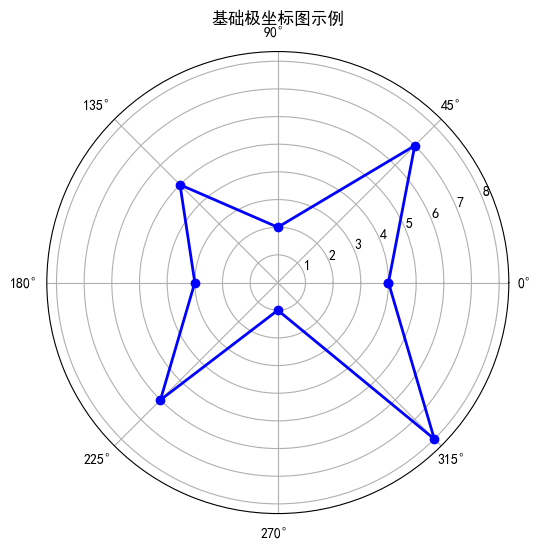

In [3]:
# 生成数据
theta = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # 8个等分角度
r = np.array([4, 7, 2, 5, 3, 6, 1, 8])  # 对应极径
# 在数组末尾添加起始点，实现闭合
theta = np.append(theta, theta[0])  # 补充起始角度
r = np.append(r, r[0])              # 补充起始极径

# 绘制极坐标图
ax = plt.figure(figsize=(6, 6))
plt.polar(theta, r, marker='o', linestyle='-', color='blue', linewidth=2)

# 添加标题与标签
plt.title('基础极坐标图示例', pad=20)  # pad控制标题与图的间距
plt.show()

#### 函数原理:

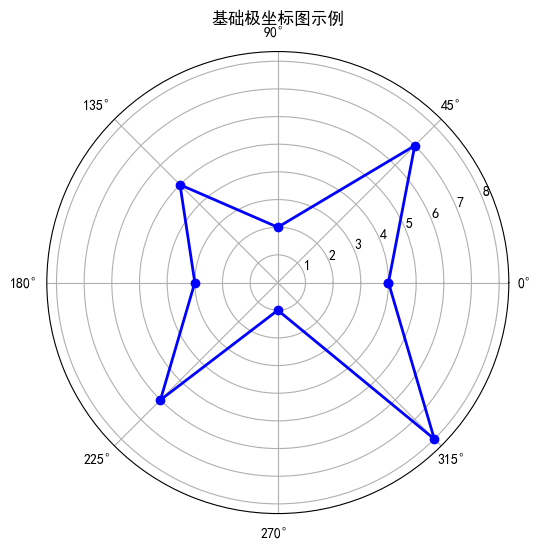

In [4]:
# 方法2：使用projection参数，显式创建极坐标子图

theta = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # 8个等分角度
r = np.array([4, 7, 2, 5, 3, 6, 1, 8])  # 对应极径
# 在数组末尾添加起始点，实现闭合
theta = np.append(theta, theta[0])  # 补充起始角度
r = np.append(r, r[0])              # 补充起始极径

fig = plt.figure(figsize=(6, 6))
# 使用projection参数，显式创建极坐标子图
ax = fig.add_subplot(111, projection='polar')

ax.plot(theta, r, marker='o', linestyle='-', color='blue', linewidth=2)

# 添加标题与标签
plt.title('基础极坐标图示例', pad=20)
plt.show()

# 2、使用示例：

### 2.1 自定义极坐标图

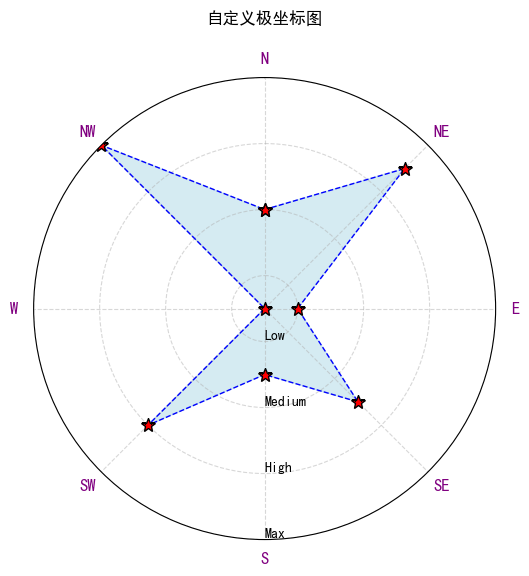

In [5]:
# 生成数据
theta = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # 8个等分角度
r = np.array([4, 7, 2, 5, 3, 6, 1, 8])  # 对应极径
# 在数组末尾添加起始点，实现闭合
theta = np.append(theta, theta[0])  # 补充起始角度
r = np.append(r, r[0])              # 补充起始极径

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')

# ================自定义极坐标图=======================
# 绘制极坐标图
ax.plot(theta, r, 
        marker='*', 
        markersize=10,
        markerfacecolor='red',
        markeredgecolor='k',
        linestyle='--', 
        color='blue', 
        linewidth=1.0
       )

# 填充内部区域
plt.fill_between(theta, r, color='lightblue', alpha=0.5)

# 设置网格线
ax.grid(True, linestyle='--', alpha=0.5)
# 设置半径范围
ax.set_rlim(1, 8)
# 定制径向网格线
ax.set_rgrids([2, 4, 6, 8], labels=['Low', 'Medium', 'High', 'Max'], 
              angle=180, fontsize=10, color='k')

# 设置角度刻度
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'], fontsize=12, color='purple')
# 设置角度零点位置（北方向）
ax.set_theta_zero_location('N')
# 设置角度增加方向（顺时针）
ax.set_theta_direction(-1)
# ================自定义极坐标图=======================

# 添加标题与标签
plt.title('自定义极坐标图', pad=20)
plt.show()

### 2.2 风向玫瑰图

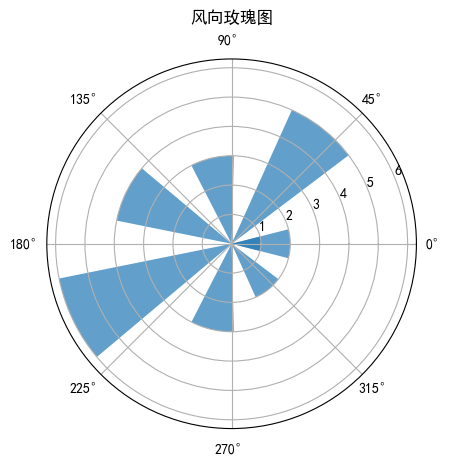

In [6]:
# 生成示例数据
directions = np.linspace(0, 2*np.pi, 8)
speeds = [2, 5, 3, 4, 6, 3, 2, 1]

# 创建极坐标条形图
ax = plt.subplot(111, projection='polar')
ax.bar(directions, speeds, alpha=0.7, width=0.5)

# 设置标题和标签
ax.set_title('风向玫瑰图', va='bottom')
plt.show()

### 2.3 雷达图

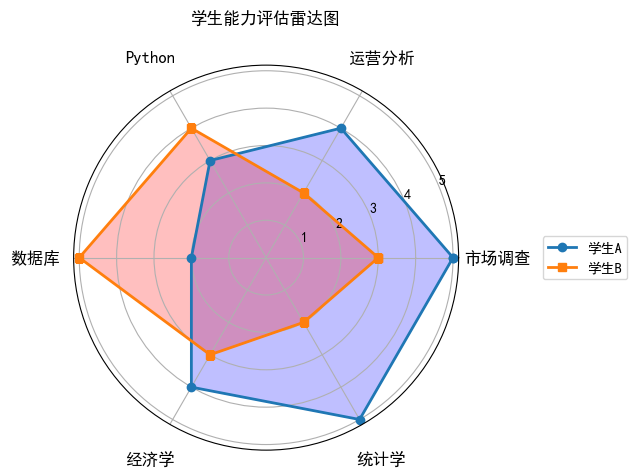

In [7]:
# 数据准备
categories = ['市场调查', '运营分析', 'Python', '数据库', '经济学', '统计学']
student_a = [5, 4, 3, 2, 4, 5]  # 学生A的评分
student_b = [3, 2, 4, 5, 3, 2]  # 学生B的评分

# 闭合数据
theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
theta = np.concatenate([theta, [theta[0]]])
a_scores = np.concatenate([student_a, [student_a[0]]])
b_scores = np.concatenate([student_b, [student_b[0]]])

# 绘制雷达图
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, a_scores, 'o-', linewidth=2, label='学生A')
ax.fill(theta, a_scores, alpha=0.25, color='blue')
ax.plot(theta, b_scores, 's-', linewidth=2, label='学生B')
ax.fill(theta, b_scores, alpha=0.25, color='red')

# 定制标签
ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories, fontsize=12)
# 调整标签的位置
labels = ax.get_xticklabels()
for label, angle in zip(labels, theta[:-1]):
    label.set_position((angle, label.get_position()[1]-0.1))  # 向外微调

ax.set_title('学生能力评估雷达图', pad=30)
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

plt.show()

### 2.4 极坐标散点图

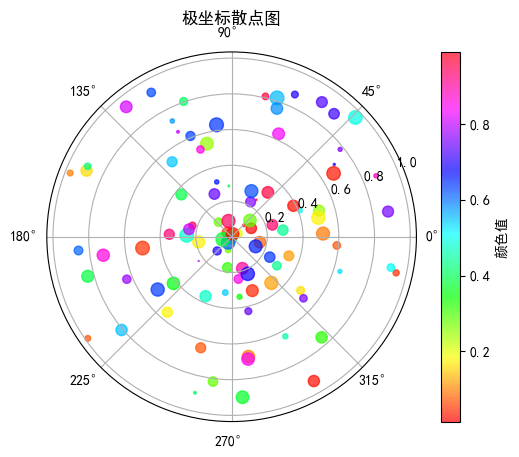

In [8]:
# 生成随机数据
np.random.seed(42)
theta = np.random.uniform(0, 2*np.pi, 100)
r = np.random.uniform(0, 1, 100)
sizes = 100 * np.random.rand(100)
colors = np.random.rand(100)

# 创建极坐标图
ax = plt.subplot(111, projection='polar')

# 绘制散点图（plt.polar 不支持 cmap）
sc = ax.scatter(theta, r, c=colors, s=sizes, cmap='hsv', alpha=0.7)

# 添加颜色条
plt.colorbar(sc, ax=ax, label='颜色值')

plt.title("极坐标散点图", pad=20)
plt.show()


### 2.5 极坐标等高线图

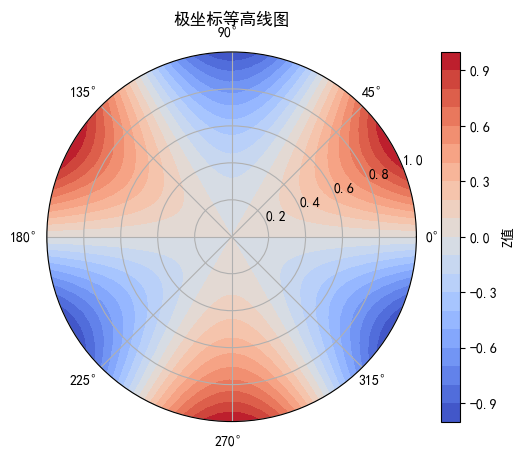

In [9]:
# 生成网格数据
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 1, 50)
T, R = np.meshgrid(theta, r)
Z = np.sin(3*T) * R**2

# 创建极坐标图
ax = plt.subplot(111, projection='polar')

# 绘制等高线图
contour = ax.contourf(T, R, Z, 20, cmap='coolwarm')

# 添加颜色条
plt.colorbar(contour, ax=ax, label='Z值')

plt.title("极坐标等高线图", pad=20)
plt.show()
